<a href="https://colab.research.google.com/github/chaegeon/Multi-learning/blob/main/%EA%B5%90%ED%86%B5%EB%9F%89%EA%B3%BC_%EB%8C%80%EA%B8%B0%EC%98%A4%EC%97%BC_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rawData = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/실습/대기오염정보/airTraffic.csv')
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
0,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0
1,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0
2,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0
3,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0
4,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0
...,...,...,...,...,...,...,...,...
739,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0
740,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0
741,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0
742,07-31-23,22.0,17.0,0.052,0.011,0.4,0.003,2270.0


# 한글 설정

In [3]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


# 교통량과 대기오염 시각화
- 자동차 매연과 대기오염(미세먼지, 초미세먼지)과의 관계를 시각화를 통해서 확인
  - 매연 정보는 교통량을 통해 확인
    - 즉, 교통량이 많을 수록 매연도 많아질 것으로 가정

- 강남구 선릉역 기준으로 `2021-07` 한달간의 대기오염 정보와 교통량 데이터를 시간단위로 수집( `2021-07-01 00 ~ 2021-07-31 24`)


## 시계열 분석을 위한 준비

In [4]:
rawData['dateTime'] = rawData['날짜']
rawData
# 데이트탄임을 시간컬럼으로 바꾸고 인덱스로?

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,dateTime
0,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,07-01-01
1,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,07-01-02
2,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,07-01-03
3,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,07-01-04
4,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,07-01-05
...,...,...,...,...,...,...,...,...,...
739,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,07-31-20
740,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,07-31-21
741,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,07-31-22
742,07-31-23,22.0,17.0,0.052,0.011,0.4,0.003,2270.0,07-31-23


dateTime 컬럼을 `날짜` 타입으로 변경
- 현재 날짜 타입은 `pandas`의 날짜-시간 타입과 맞지 않습니다. 

```
pd.to_datetime( '07-31-00', format='%m-%d-%H')
은 변환이 되지만

pd.to_datetime( '07-31-24', format='%m-%d-%H')
는 변환이 안 됨
 ```
- => 00시~23시까지 인 듯
- 현재시간에서 1씩 빼주고, 다시 저장
  - 문자열 형태로 되어있기 때문에 고려해서 처리

In [5]:
rawData['dateTime']

0      07-01-01
1      07-01-02
2      07-01-03
3      07-01-04
4      07-01-05
         ...   
739    07-31-20
740    07-31-21
741    07-31-22
742    07-31-23
743    07-31-24
Name: dateTime, Length: 744, dtype: object

In [6]:
def setDateTime(row):
  return row['dateTime']
rawData.apply(lambda x: setDateTime(x), axis=1)

0      07-01-01
1      07-01-02
2      07-01-03
3      07-01-04
4      07-01-05
         ...   
739    07-31-20
740    07-31-21
741    07-31-22
742    07-31-23
743    07-31-24
Length: 744, dtype: object

In [7]:
def setDateTime(row):
  month, day, hour = row['dateTime'].split('-')
  hour = int(hour) - 1
  return '-'.join( [month, day, str(hour)] )
rawData.apply(lambda x: setDateTime(x), axis=1)

0       07-01-0
1       07-01-1
2       07-01-2
3       07-01-3
4       07-01-4
         ...   
739    07-31-19
740    07-31-20
741    07-31-21
742    07-31-22
743    07-31-23
Length: 744, dtype: object

In [8]:
def setDateTime(row):
  month, day, hour = row['dateTime'].split('-')
  hour = '{:02}'.format( int(hour) - 1)
  return '-'.join( [month, day, str(hour)] )
rawData.apply(lambda x: setDateTime(x), axis=1)

0      07-01-00
1      07-01-01
2      07-01-02
3      07-01-03
4      07-01-04
         ...   
739    07-31-19
740    07-31-20
741    07-31-21
742    07-31-22
743    07-31-23
Length: 744, dtype: object

In [9]:
def setDateTime( row ):
  month, day, hour = row['dateTime'].split('-')
  hour = '{:02}'.format(int(hour) - 1)
  return pd.to_datetime( '-'.join( [ '2021', month, day, hour ] ), format='%Y-%m-%d-%H' )
# 년도를 안 적으니까 1900년으로 설정이 되어서

rawData['dateTime'] = rawData.apply( lambda x: setDateTime(x), axis=1 )
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,dateTime
0,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,2021-07-01 00:00:00
1,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,2021-07-01 01:00:00
2,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,2021-07-01 02:00:00
3,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,2021-07-01 03:00:00
4,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,2021-07-01 04:00:00
...,...,...,...,...,...,...,...,...,...
739,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,2021-07-31 19:00:00
740,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,2021-07-31 20:00:00
741,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,2021-07-31 21:00:00
742,07-31-23,22.0,17.0,0.052,0.011,0.4,0.003,2270.0,2021-07-31 22:00:00


for loop를 이용한 변경

In [10]:
# 판다스?에서는 apply쓰는 게 더 낫다는 듯
# 위에서 이미 변환해서 이건 에러가 나는 거임
# for index, row in rawData.iterrows():
  # month, day, hour = row['dateTime'].split('-')
  # hour = '{:02}'.format(int(hour) - 1)
  ## print( pd.to_datetime( '-'.join( [ '2021', month, day, hour ] ), format='%Y-%m-%d-%H' ) )
  # rawData.loc[ index, 'dateTime'] = pd.to_datetime( '-'.join( [ '2021', month, day, hour ] ), format='%Y-%m-%d-%H' )

AttributeError: ignored

In [11]:
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,dateTime
0,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,2021-07-01 00:00:00
1,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,2021-07-01 01:00:00
2,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,2021-07-01 02:00:00
3,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,2021-07-01 03:00:00
4,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,2021-07-01 04:00:00
...,...,...,...,...,...,...,...,...,...
739,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,2021-07-31 19:00:00
740,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,2021-07-31 20:00:00
741,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,2021-07-31 21:00:00
742,07-31-23,22.0,17.0,0.052,0.011,0.4,0.003,2270.0,2021-07-31 22:00:00


## 시간 컬럼을 인덱스로 설정 
- 시계열 자료인 경우 시간을 인덱스로 활용

In [19]:
rawData.set_index('dateTime', inplace=True)
rawData # dateTime 컬럼을 인덱스로 바꿔줬음

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-01 00:00:00,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0
2021-07-01 01:00:00,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0
2021-07-01 02:00:00,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0
2021-07-01 03:00:00,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0
2021-07-01 04:00:00,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0
...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0
2021-07-31 20:00:00,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0
2021-07-31 21:00:00,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0


In [20]:
rawData.index

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 01:00:00',
               '2021-07-01 02:00:00', '2021-07-01 03:00:00',
               '2021-07-01 04:00:00', '2021-07-01 05:00:00',
               '2021-07-01 06:00:00', '2021-07-01 07:00:00',
               '2021-07-01 08:00:00', '2021-07-01 09:00:00',
               ...
               '2021-07-31 14:00:00', '2021-07-31 15:00:00',
               '2021-07-31 16:00:00', '2021-07-31 17:00:00',
               '2021-07-31 18:00:00', '2021-07-31 19:00:00',
               '2021-07-31 20:00:00', '2021-07-31 21:00:00',
               '2021-07-31 22:00:00', '2021-07-31 23:00:00'],
              dtype='datetime64[ns]', name='dateTime', length=744, freq=None)

In [22]:
rawData = rawData.asfreq('H') #프리퀀시를 만들어주면? 없는 주기는 자동으로 만들어짐?

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-01 00:00:00,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0
2021-07-01 01:00:00,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0
2021-07-01 02:00:00,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0
2021-07-01 03:00:00,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0
2021-07-01 04:00:00,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0
...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0
2021-07-31 20:00:00,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0
2021-07-31 21:00:00,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0


### 결측치 확인

In [23]:
import missingno

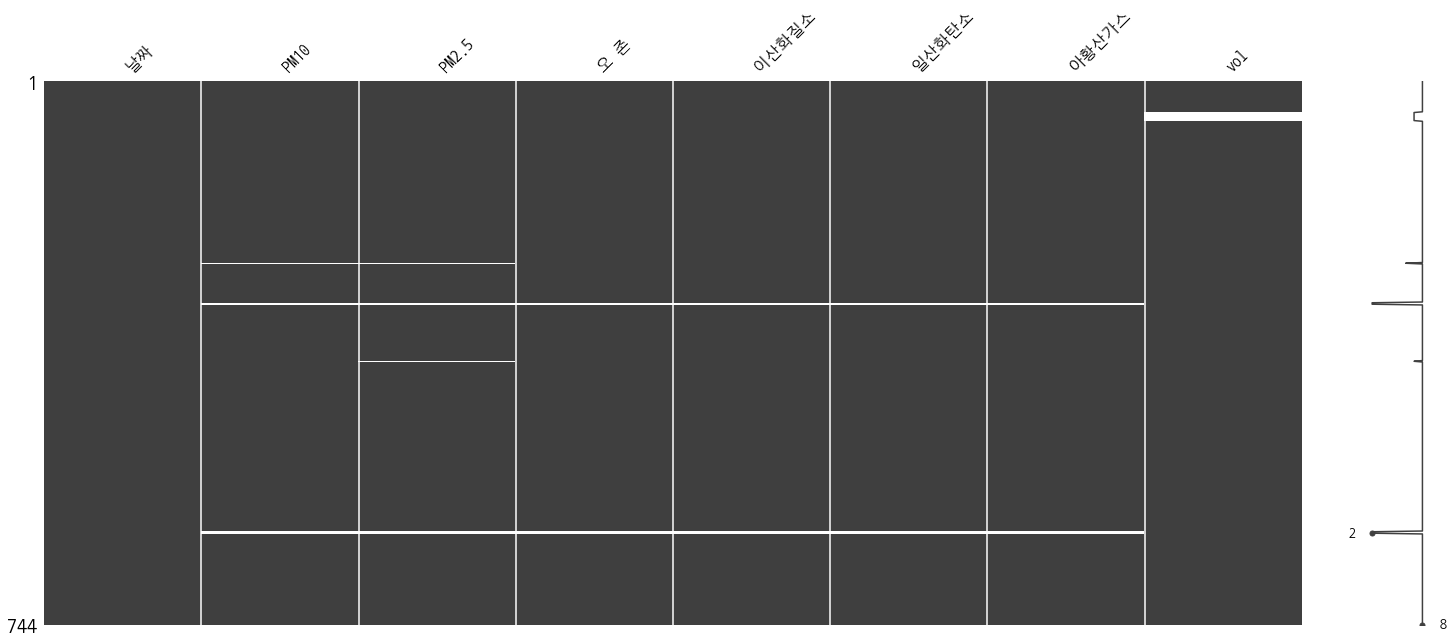

In [24]:
missingno.matrix( rawData)
# 누락된 부분 보여주는 거?
# -> 채우든가, 지우든가 해줘야 됨

교통량 정보가 없는 데이터 확인

In [25]:
rawData[ rawData['vol'].isna() ]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-02 19:00:00,07-02-20,23.0,17.0,0.040,0.017,0.3,0.003,NaN
2021-07-02 20:00:00,07-02-21,23.0,19.0,0.029,0.025,0.3,0.003,NaN
2021-07-02 21:00:00,07-02-22,21.0,14.0,0.024,0.022,0.3,0.003,NaN
2021-07-02 22:00:00,07-02-23,19.0,12.0,0.020,0.022,0.3,0.003,NaN
2021-07-02 23:00:00,07-02-24,21.0,12.0,0.019,0.022,0.3,0.003,NaN
2021-07-03 00:00:00,07-03-01,19.0,12.0,0.023,0.015,0.3,0.003,NaN
2021-07-03 01:00:00,07-03-02,17.0,11.0,0.026,0.011,0.3,0.003,NaN
2021-07-03 02:00:00,07-03-03,20.0,10.0,0.025,0.010,0.3,0.003,NaN
2021-07-03 03:00:00,07-03-04,16.0,10.0,0.028,0.008,0.2,0.003,NaN


In [26]:
from datetime import datetime
datetime(2021, 7, 1, hour=18)

datetime.datetime(2021, 7, 1, 18, 0)

In [27]:
rawData.loc[[ datetime(2021, 7, 2, hour=18) ]]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-02 18:00:00,07-02-19,26.0,16.0,0.042,0.021,0.3,0.003,2107.0


In [28]:
rawData.loc[[ datetime(2021, 7, 3, hour=7) ]]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-03 07:00:00,07-03-08,13.0,8.0,0.021,0.017,0.2,0.003,844.0


이전 시간 교통량으로 결측치를 채워봅니다.

In [33]:
rawData['vol_fill'] = rawData['vol'].fillna( method='ffill')
# ffill 은 이전(앞의) 데이터로 결측치를 채워주고
# bfill 은 다음(뒤의) 데이터로 결측치를 채워줌


In [34]:
rawData.loc[ datetime(2021, 7, 2, hour=18):datetime(2021, 7, 3, hour=7) ]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill
dateTime,,,,,,,,,
2021-07-02 18:00:00,07-02-19,26.0,16.0,0.042,0.021,0.3,0.003,2107.0,2107.0
2021-07-02 19:00:00,07-02-20,23.0,17.0,0.040,0.017,0.3,0.003,NaN,2107.0
2021-07-02 20:00:00,07-02-21,23.0,19.0,0.029,0.025,0.3,0.003,NaN,2107.0
2021-07-02 21:00:00,07-02-22,21.0,14.0,0.024,0.022,0.3,0.003,NaN,2107.0
2021-07-02 22:00:00,07-02-23,19.0,12.0,0.020,0.022,0.3,0.003,NaN,2107.0
2021-07-02 23:00:00,07-02-24,21.0,12.0,0.019,0.022,0.3,0.003,NaN,2107.0
2021-07-03 00:00:00,07-03-01,19.0,12.0,0.023,0.015,0.3,0.003,NaN,2107.0
2021-07-03 01:00:00,07-03-02,17.0,11.0,0.026,0.011,0.3,0.003,NaN,2107.0
2021-07-03 02:00:00,07-03-03,20.0,10.0,0.025,0.010,0.3,0.003,NaN,2107.0


대기오염 정보와 교통량이 없는 데이터에 대해서는 이전 시간의 값을 채워주도록 하겠습니다

In [35]:
rawData.fillna( method='ffill', inplace=True)
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill
dateTime,,,,,,,,,
2021-07-01 00:00:00,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,1542.0
2021-07-01 01:00:00,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,1173.0
2021-07-01 02:00:00,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,869.0
2021-07-01 03:00:00,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,711.0
2021-07-01 04:00:00,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,659.0
...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,2456.0
2021-07-31 20:00:00,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,1960.0
2021-07-31 21:00:00,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,2083.0


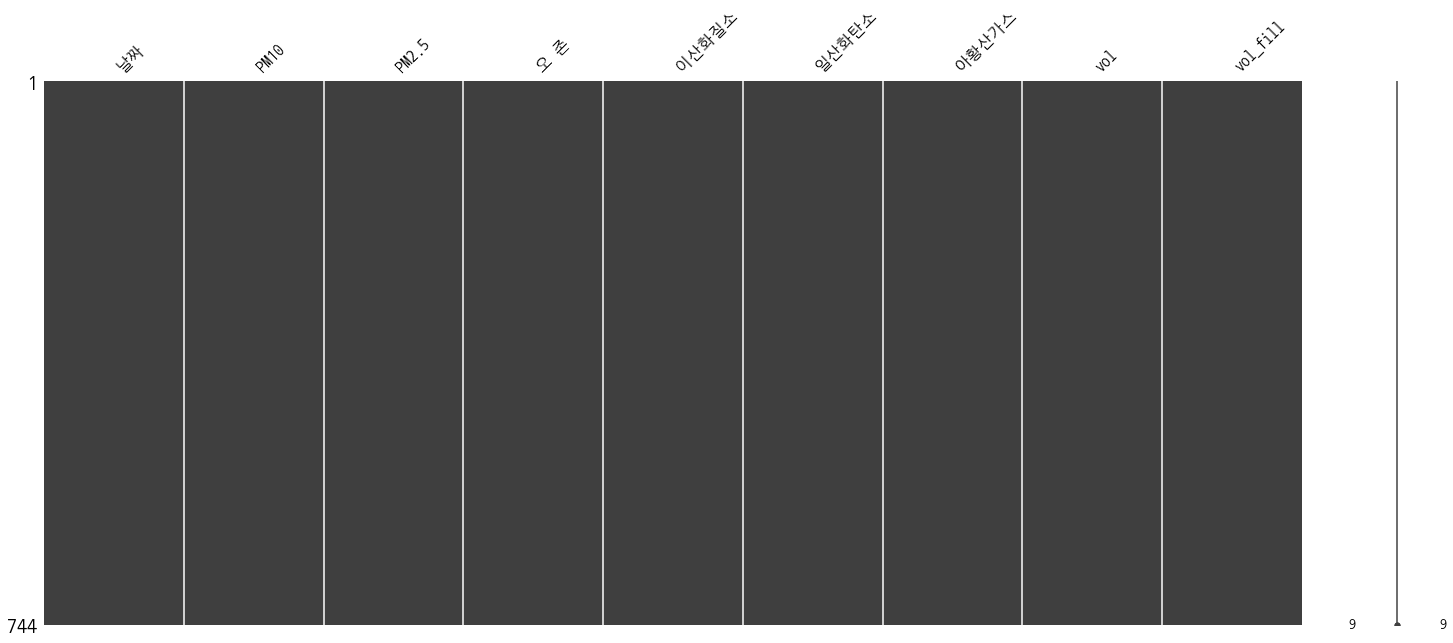

In [37]:
missingno.matrix(rawData)
# 결측치 없어짐

### 교통량 정보 확인

In [38]:
rawData['vol'].unique()

array([1542., 1173.,  869.,  711.,  659., 1039., 2039., 3516., 3773.,
       3895., 3774., 3878., 3672., 3786., 3728., 3987., 3630., 2992.,
       2399., 2572., 2901., 3227., 2921., 1776., 1523., 1223.,  805.,
        712.,  664., 1063., 2032., 3447., 3756., 3791., 3854., 3989.,
       3696., 3890., 3922., 3662., 3612., 2793., 2107.,  844., 2714.,
       3509., 3811., 4027., 3592., 3727., 3735., 3602., 3341., 3499.,
       3430., 2800., 2313., 2265., 2140., 1200., 1074.,  835.,  532.,
        420.,  375.,  464.,  771., 1059., 1673., 2272., 2638., 2939.,
       3510., 3388., 3205., 3190., 3349., 2738., 2480., 1937., 2059.,
       1838., 1256.,  842.,  589.,  430.,  386.,  473.,  962., 2163.,
       3625., 3740., 3790., 3715., 3829., 3450., 4038., 3742., 3458.,
       2567., 2934., 2929., 3319., 2558., 2060., 1610., 1204.,  867.,
        695.,  663., 1058., 2066., 3590., 3837., 3809., 3831., 3855.,
       3614., 3857., 4048., 3761., 3684., 2703., 2327., 2949., 2973.,
       3387., 2807.,

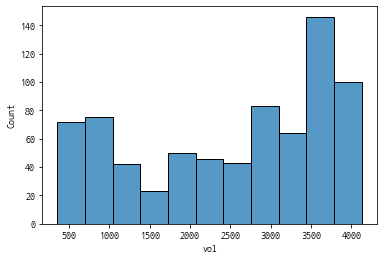

In [39]:
sns.histplot( data=rawData, x='vol')

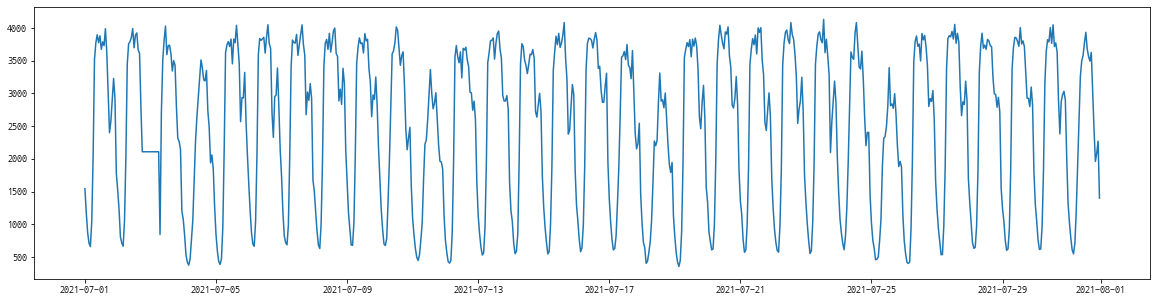

In [42]:
plt.figure( figsize=(20,5) )
plt.plot(rawData['vol'])
# matplot으로 하면 
# 인덱스 기준으로 해서 자동으로 그려줌


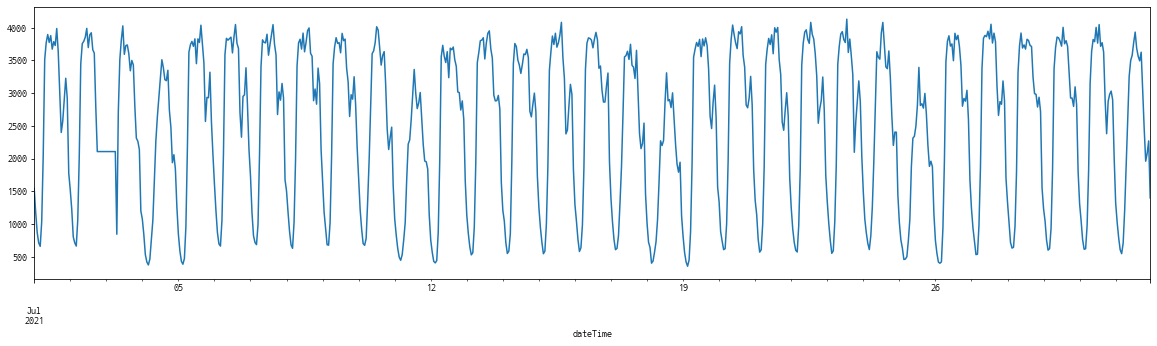

In [44]:
rawData['vol'].plot(kind='line', figsize=(20,5))

### 미세먼지와 초미세먼지 확인

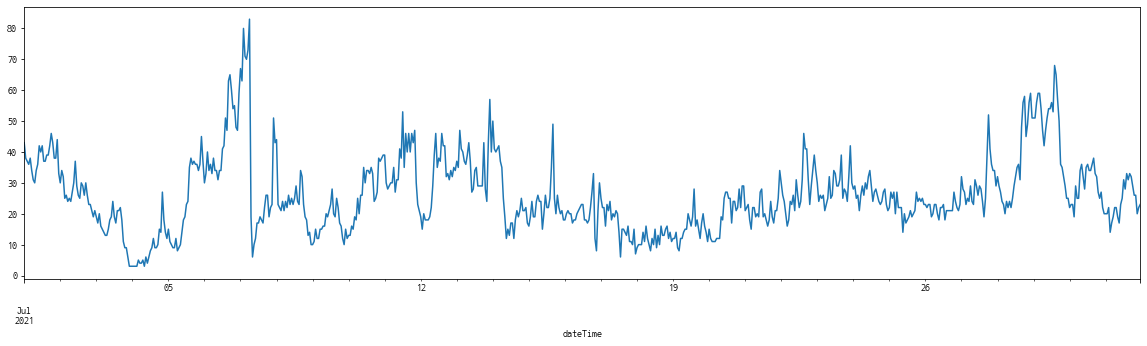

In [45]:
rawData['PM10'].plot( kind='line', figsize = (20,5) )

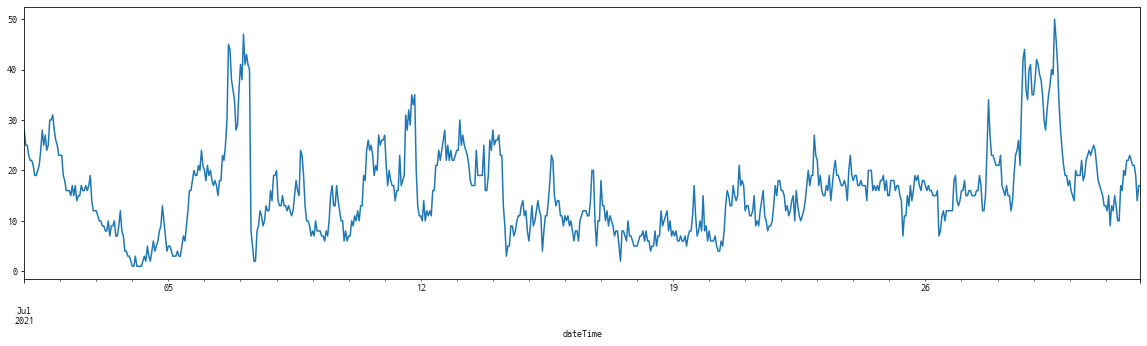

In [46]:
rawData['PM2.5'].plot( kind='line', figsize = (20,5) )

### 교통량과 미세먼지의 관계
- 어떤 그림을 그리면 확인이 제일 쉬울까?


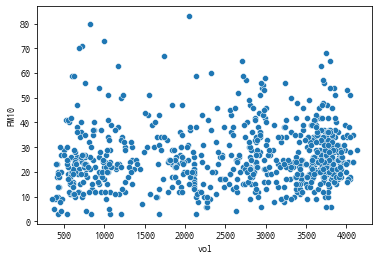

In [53]:
sns.scatterplot(data = rawData, x='vol', y='PM10')

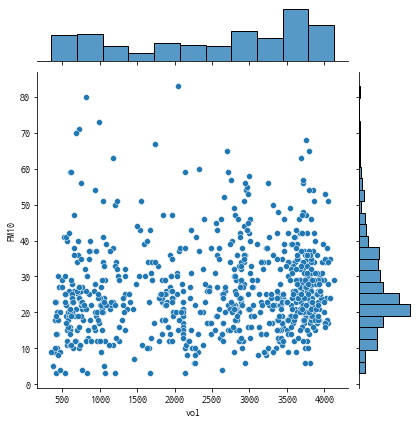

In [54]:
sns.jointplot(data = rawData, x='vol', y='PM10')

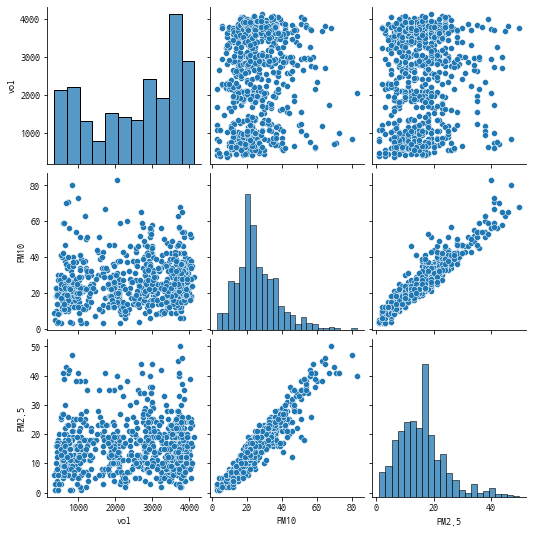

In [55]:
sns.pairplot( rawData[['vol', 'PM10', 'PM2.5']])

<function matplotlib.pyplot.show>

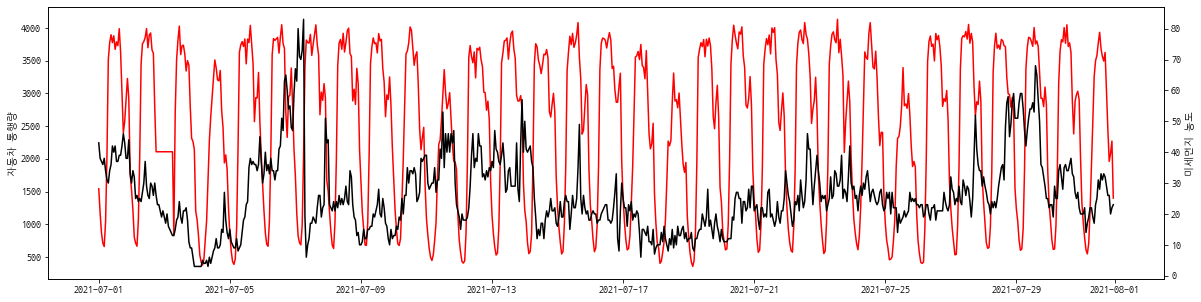

In [61]:
plt.figure( figsize=(20,5))
plt.plot(rawData['vol'], color = 'red')
plt.ylabel('자동차 통행량')

ax = plt.gca()
ax2 = ax.twinx()  # 단위가 다른 두 객체의 단위를 같게 해줌
ax2.plot( rawData['PM10'], color='black') # 단위가 달라서 제대로 안 그려짐
ax2.set_ylabel('미세먼지 농도')

plt.show

#### 누적 통행량?
- 데이터는 다양한 확인이 필요 합니다. 
- 차량의 누적 통행량과 비교하면 어떨까요? 

In [62]:
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill
dateTime,,,,,,,,,
2021-07-01 00:00:00,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,1542.0
2021-07-01 01:00:00,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,1173.0
2021-07-01 02:00:00,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,869.0
2021-07-01 03:00:00,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,711.0
2021-07-01 04:00:00,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,659.0
...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,2456.0
2021-07-31 20:00:00,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,1960.0
2021-07-31 21:00:00,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,2083.0


In [73]:
rawData['vol_cum'] = rawData['vol'].cumsum()
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill,vol_cum
dateTime,,,,,,,,,,
2021-07-01 00:00:00,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,1542.0,1542.0
2021-07-01 01:00:00,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,1173.0,2715.0
2021-07-01 02:00:00,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,869.0,3584.0
2021-07-01 03:00:00,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,711.0,4295.0
2021-07-01 04:00:00,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,659.0,4954.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,2456.0,1868491.0
2021-07-31 20:00:00,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,1960.0,1870451.0
2021-07-31 21:00:00,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,2083.0,1872534.0


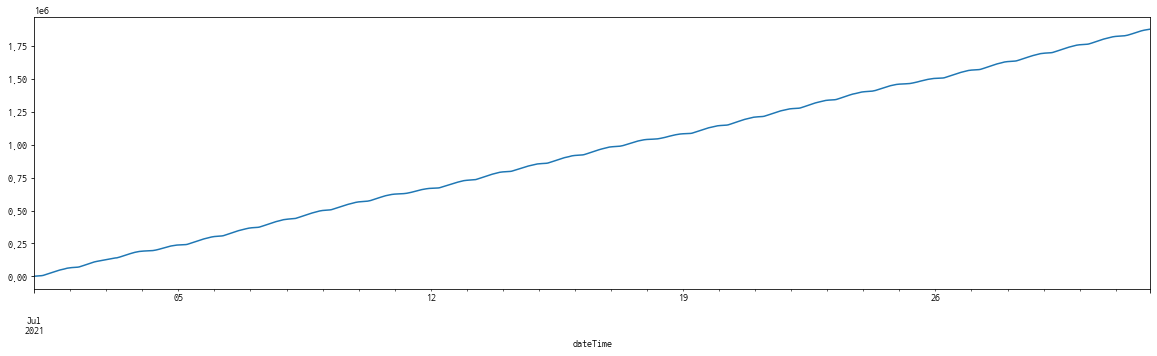

In [74]:
rawData['vol_cum'].plot( kind='line', figsize=(20,5))

왜 우리나라 인구수는 계속 증가하는지?
- 데이터는 해석이 매우 중요합니다. 

#### 시간대별 증/감량?
- 증/감량을 어떻게 구해볼 수 있을까요?
- 차분(diff)

In [78]:
rawData['vol_diff'] = rawData['vol'].diff()
rawData['vol_diff'].fillna( method='bfill', inplace= True )

In [79]:
rawData['vol_diff'] = - rawData['vol_diff']
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill,vol_cum,col_diff,vol_diff
dateTime,,,,,,,,,,,,
2021-07-01 00:00:00,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,1542.0,1542.0,1542.0,NaN,369.0
2021-07-01 01:00:00,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,1173.0,1173.0,2715.0,-369.0,369.0
2021-07-01 02:00:00,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,869.0,869.0,3584.0,-304.0,304.0
2021-07-01 03:00:00,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,711.0,711.0,4295.0,-158.0,158.0
2021-07-01 04:00:00,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,659.0,659.0,4954.0,-52.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,2456.0,2456.0,1868491.0,-583.0,583.0
2021-07-31 20:00:00,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,1960.0,1960.0,1870451.0,-496.0,496.0
2021-07-31 21:00:00,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,2083.0,2083.0,1872534.0,123.0,-123.0


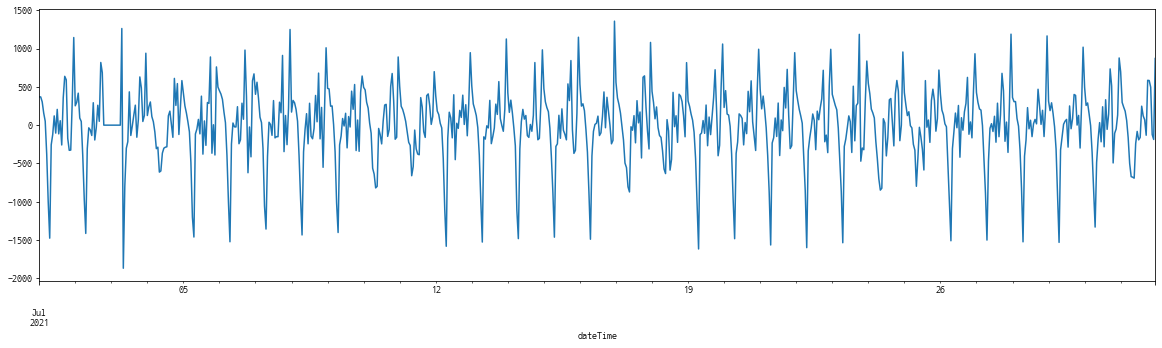

In [82]:
rawData['vol_diff'].plot( kind = 'line', figsize = (20,5))

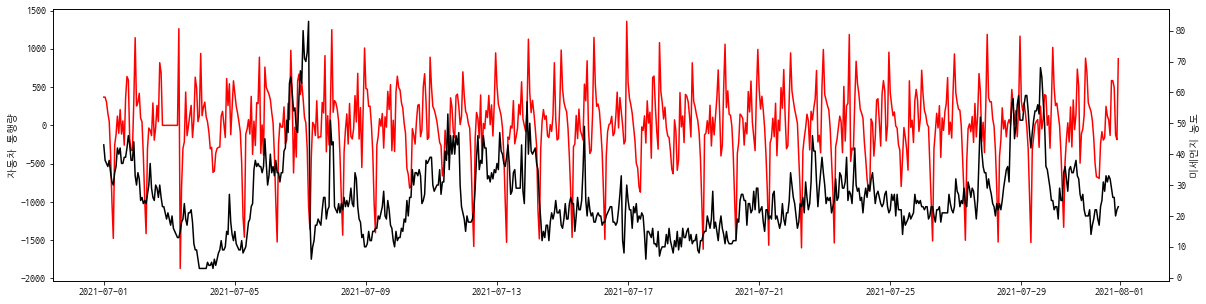

In [83]:
plt.figure( figsize=(20,5) )
plt.plot( rawData['vol_diff'], color='red' )
plt.ylabel('자동차 통행량')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot( rawData['PM10'], color='black' )
ax2.set_ylabel('미세먼지 농도')

plt.show()

# 유입/유출 구분

In [85]:
rawData = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/실습/대기오염정보/airTraffic2.csv')
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,in,out
0,07-01-01,43.0,28.0,0.014,0.036,0.5,0.003,695.0,847.0
1,07-01-02,38.0,25.0,0.013,0.029,0.5,0.003,505.0,668.0
2,07-01-03,37.0,25.0,0.014,0.022,0.4,0.003,432.0,437.0
3,07-01-04,36.0,23.0,0.016,0.016,0.4,0.003,312.0,399.0
4,07-01-05,38.0,22.0,0.014,0.016,0.4,0.003,289.0,370.0
...,...,...,...,...,...,...,...,...,...
739,07-31-20,26.0,21.0,0.052,0.015,0.4,0.004,1023.0,1433.0
740,07-31-21,26.0,19.0,0.042,0.017,0.4,0.004,776.0,1184.0
741,07-31-22,20.0,14.0,0.051,0.011,0.4,0.004,809.0,1274.0
742,07-31-23,22.0,17.0,0.052,0.011,0.4,0.003,1034.0,1236.0


## 시각화
- 유입 차량과 유출 차량의 차이를 구해서 그 차이가 미세먼지와 관계가 있는지 확인해보도록 합니다. 

In [89]:
rawData['dateTime'] = rawData['날짜']

In [95]:
def setDateTime(row):
  month, day, hour = row['dateTime'].split('-')
  hour = '{:02}'.format( int(hour) - 1)
  return pd.to_datetime( '-'.join( [ '2021', month, day, hour ] ), format='%Y-%m-%d-%H' )

rawData['dateTime'] = rawData.apply( lambda x: setDateTime(x), axis=1 )
rawData.set_index('dateTime', inplace=True)
rawData.apply(lambda x: setDateTime(x), axis=1)

AttributeError: ignored

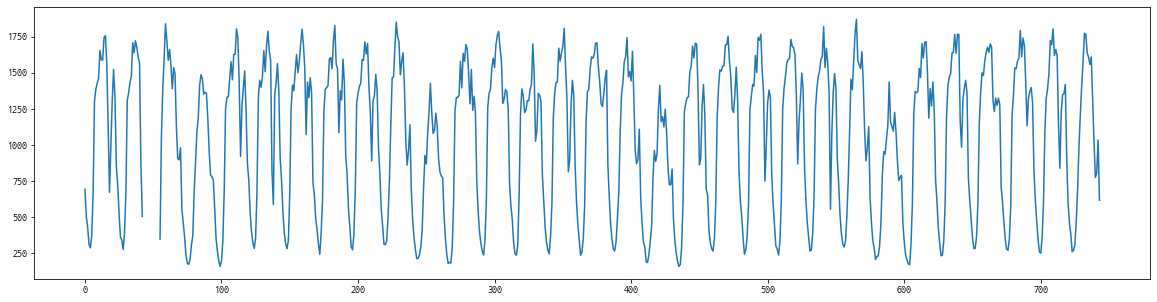

In [86]:
rawData['in'].plot(kind='line', figsize=(20,5) )

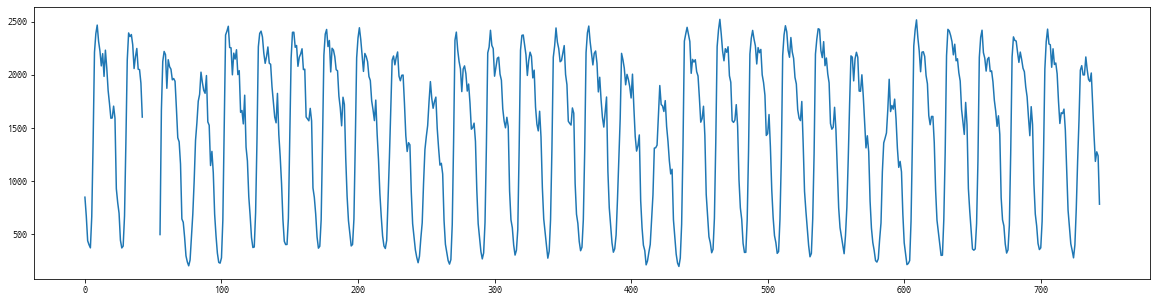

In [87]:
rawData['out'].plot(kind='line', figsize=(20,5) )

In [96]:
rawData['diff'] = rawData['in'] - rawData['out']

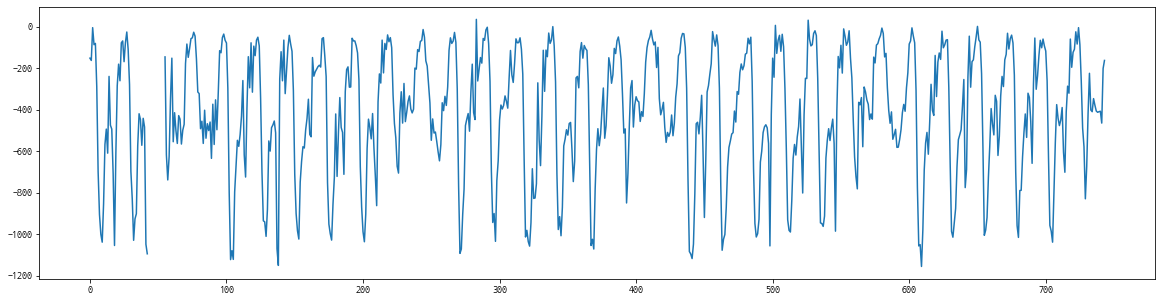

In [97]:
rawData['diff'].plot(kind='line', figsize=(20,5) )